In [9]:
# menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Membaca data file lalu Setup dan Import

In [10]:
# memanggil dataset lewat gdrive
path = "/content/gdrive/My Drive/semester7/MachineLearning/praktikum_ml/praktikum03/"

# util & plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# modeling & evaluasi
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# OLS (statmodels)
import statsmodels.api as sm

pd.set_option("display.max_columns", 50)

### Memmbaca file dataset CSV

In [11]:
# membaca file csv menggunakan pandas
import pandas as pd

df = pd.read_csv(path + 'data/day.csv', sep=",")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Melihat Informasi umum pada data

In [12]:
# mencari info data pada file (tipe datanya, non nul count data, nama kolom)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### Menghitung statistik deskriptif pada kolom numeric dengan describe

In [13]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Seleksi Fitur (Pra-proses data)

In [14]:
target = "cnt"
drop_cols = ["instant", "dteday", "casual", "registered", target]

feature_cols = [c for c in df.columns if c not in drop_cols]
X = df[feature_cols].copy()
y = df[target].copy()

print("Fitur yang digunakan:", feature_cols)

Fitur yang digunakan: ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']


### Analisis Korelasi

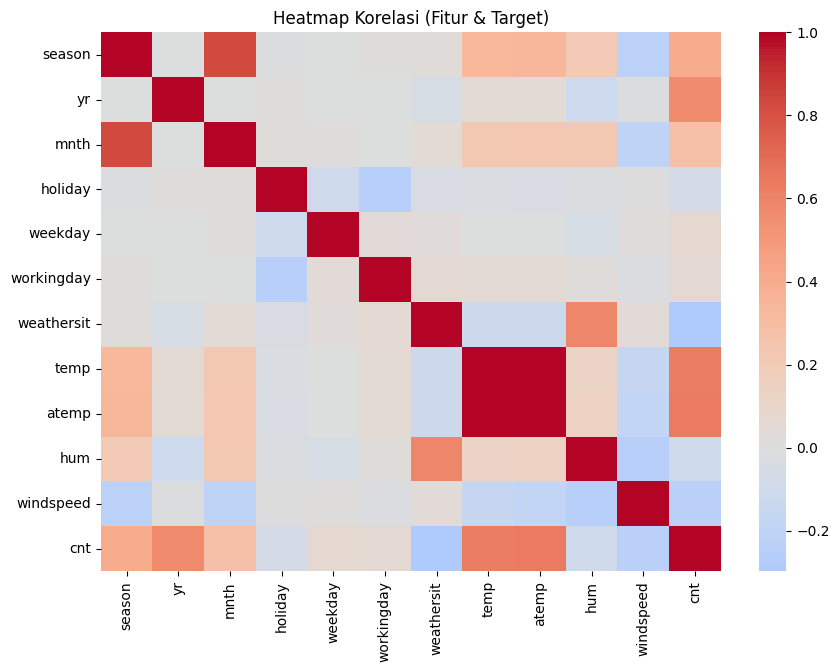

In [15]:
corr_matrix = pd.concat([X, y], axis=1).corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Heatmap Korelasi (Fitur & Target)")
plt.show()

In [16]:
corr_to_cnt = corr_matrix[target].drop(target).sort_values(ascending=False)
corr_to_cnt

,cnt
atemp,0.631066
temp,0.627494
yr,0.566710
season,0.406100
mnth,0.279977
weekday,0.067443
workingday,0.061156
holiday,-0.068348
hum,-0.100659
windspeed,-0.234545


### Split Data (train 80% / test 20%)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Jumlah data train:", len(X_train))
print("Jumlah data test :", len(X_test))

Jumlah data train: 584
Jumlah data test : 147


### Model: Linear Regression (scikit-learn)

In [18]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

print("Intercept :", linreg.intercept_)
coef_tab = pd.DataFrame({"Feature": feature_cols, "Coefficient": linreg.coef_}).sort_values("Coefficient", ascending=False)
coef_tab

Intercept : 1248.3209284778172


,Feature,Coefficient
8,atemp,3488.042179
7,temp,2097.247836
1,yr,2023.997547
0,season,524.722536
5,workingday,160.804892
4,weekday,72.937003
2,mnth,-38.444658
3,holiday,-391.550766
6,weathersit,-632.856284
9,hum,-865.439419


### Persamaan Regresi

In [19]:
eq = "cnt = {:.3f}".format(linreg.intercept_)
for f, c in zip(feature_cols, linreg.coef_):
    eq += " + ({:.3f} * {})".format(c, f)
print(eq)

cnt = 1248.321 + (524.723 * season) + (2023.998 * yr) + (-38.445 * mnth) + (-391.551 * holiday) + (72.937 * weekday) + (160.805 * workingday) + (-632.856 * weathersit) + (2097.248 * temp) + (3488.042 * atemp) + (-865.439 * hum) + (-2080.540 * windspeed)


### Model: OLS (statsmodels)

In [20]:
# Tambahkan konstanta ke X_train
X_train_const = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_const).fit()

# Parameter & ringkasan
print(ols_model.params)
print(ols_model.summary())

const         1248.320928
season         524.722536
yr            2023.997547
mnth           -38.444658
holiday       -391.550766
weekday         72.937003
workingday     160.804892
weathersit    -632.856284
temp          2097.247836
atemp         3488.042179
hum           -865.439419
windspeed    -2080.540395
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     196.9
Date:                Sun, 12 Oct 2025   Prob (F-statistic):          2.56e-186
Time:                        12:43:26   Log-Likelihood:                -4784.9
No. Observations:                 584   AIC:                             9594.
Df Residuals:                     572   BIC:                             9646.
Df Model:                          11    

### Evaluasi di Data Test

In [21]:
# Evaluasi Model
y_pred_test = linreg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2  = r2_score(y_test, y_pred_test)

print(f"MAE  : {mae:,.3f}")
print(f"MSE  : {mse:,.3f}")
print(f"RMSE : {rmse:,.3f}")
print(f"R²   : {r2:,.3f}")

MAE  : 617.393
MSE  : 691,035.008
RMSE : 831.285
R²   : 0.828


### Visualisasi Hasil Prediksi menggunakan scatter aktual vs prediksi

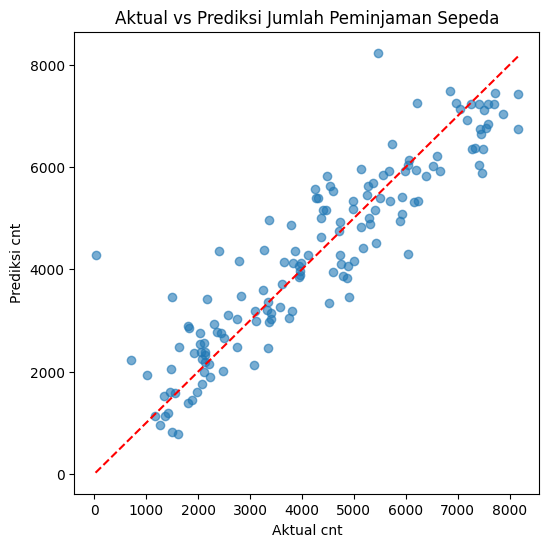

In [22]:
# Scatter: aktual vs prediksi
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Aktual cnt")
plt.ylabel("Prediksi cnt")
plt.title("Aktual vs Prediksi Jumlah Peminjaman Sepeda")
plt.show()


### Visualisasi Hasil Prediksi menggunakan residual plot sederhana

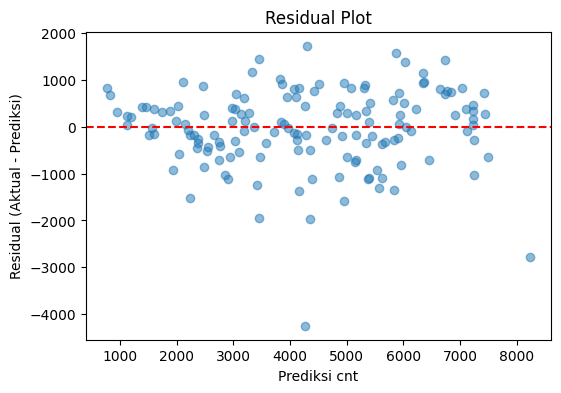

In [23]:
# Residual plot sederhana
resid = y_test - y_pred_test
plt.figure(figsize=(6,4))
plt.scatter(y_pred_test, resid, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Prediksi cnt")
plt.ylabel("Residual (Aktual - Prediksi)")
plt.title("Residual Plot")
plt.show()

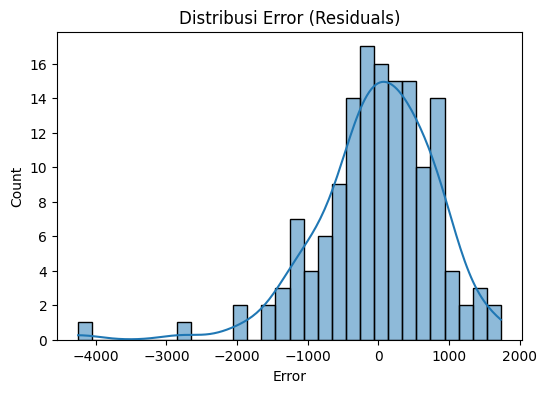

In [24]:
plt.figure(figsize=(6,4))
sns.histplot(resid, bins=30, kde=True)
plt.title("Distribusi Error (Residuals)")
plt.xlabel("Error")
plt.show()

### Tabel Hasil (error dan akurasi perbaris)

In [25]:
hasil = X_test.copy()
hasil["cnt_aktual"]   = y_test.values
hasil["cnt_prediksi"] = y_pred_test
hasil["selisih"]      = hasil["cnt_prediksi"] - hasil["cnt_aktual"]

denom = hasil["cnt_aktual"].replace(0, np.nan)
hasil["akurasi_%"] = (1 - (hasil["selisih"].abs() / denom)).clip(lower=0, upper=1) * 100

hasil.sort_values("selisih", key=np.abs, ascending=False).head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt_aktual,cnt_prediksi,selisih,akurasi_%
667,4,1,10,0,1,1,3,0.440000,0.439400,0.880000,0.358200,22,4270.533608,4248.533608,0.000000
545,3,1,6,0,5,1,1,0.834167,0.786613,0.488750,0.165417,5463,8234.505749,2771.505749,49.267696
265,4,0,9,0,5,1,2,0.609167,0.522125,0.972500,0.078367,2395,4355.069765,1960.069765,18.159926
327,4,0,11,1,4,0,1,0.373333,0.372471,0.549167,0.167304,1495,3450.473682,1955.473682,0.000000
456,2,1,4,0,0,0,2,0.425833,0.417287,0.676250,0.172267,6041,4307.202484,-1733.797516,71.299495
448,2,1,3,0,6,0,2,0.502500,0.486733,0.885417,0.192783,3372,4962.583701,1590.583701,52.829665
469,2,1,4,0,6,0,1,0.495000,0.487996,0.502917,0.190917,7460,5880.584231,-1579.415769,78.828207
340,4,0,12,0,3,1,3,0.410000,0.400246,0.970417,0.266175,705,2229.243806,1524.243806,0.000000
155,2,0,6,0,0,0,2,0.648333,0.616804,0.652500,0.138692,4906,3459.285306,-1446.714694,70.511319
629,3,1,9,0,5,1,1,0.599167,0.571971,0.668750,0.154229,8167,6745.136175,-1421.863825,82.590133


In [26]:
print("=== INTERPRETASI MODEL ===")
print(f"R²        : {r2:.3f}")
print(f"MAE       : {mae:.2f}")
print(f"RMSE      : {rmse:.2f}")

=== INTERPRETASI MODEL ===
R²        : 0.828
MAE       : 617.39
RMSE      : 831.29
